**Step 1: Importing Libraries**

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [32]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import streamlit as st
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array


**Step 2: Exploring Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#set the path to the main dir
import os
main_dir = "/content/drive/MyDrive/Omdena/Covid_Detection"
#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')
#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, '1')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, '0')
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, '1')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, '0')

In [ ]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

['covid_402.png', 'covid_611.png', 'covid_662.png', 'covid_695.png', 'covid_418.png', 'covid_666.png', 'covid_118.png', 'covid_665.png', 'covid_612.png', 'covid_752.png']
['non_COVID (124).png', 'non_COVID (233).png', 'non_COVID (433).png', 'non_COVID (298).png', 'Non_COVID (61).png', 'non_COVID (355).png', 'non_COVID (305).png', 'non_COVID (134).png', 'non_COVID (13).png', 'non_COVID (494).png']


**Step 3 : Data Visualization**

['/content/drive/MyDrive/Omdena/Covid_Detection/train/1/covid_402.png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/1/covid_611.png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/1/covid_662.png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/1/covid_695.png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/1/covid_418.png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/1/covid_666.png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/1/covid_118.png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/1/covid_665.png']
['/content/drive/MyDrive/Omdena/Covid_Detection/train/0/non_COVID (124).png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/0/non_COVID (233).png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/0/non_COVID (433).png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/0/non_COVID (298).png', '/content/drive/MyDrive/Omdena/Covid_Detection/train/0/Non_COVID (61).png', '/content/drive/MyDrive/Omdena/Covid_Detection

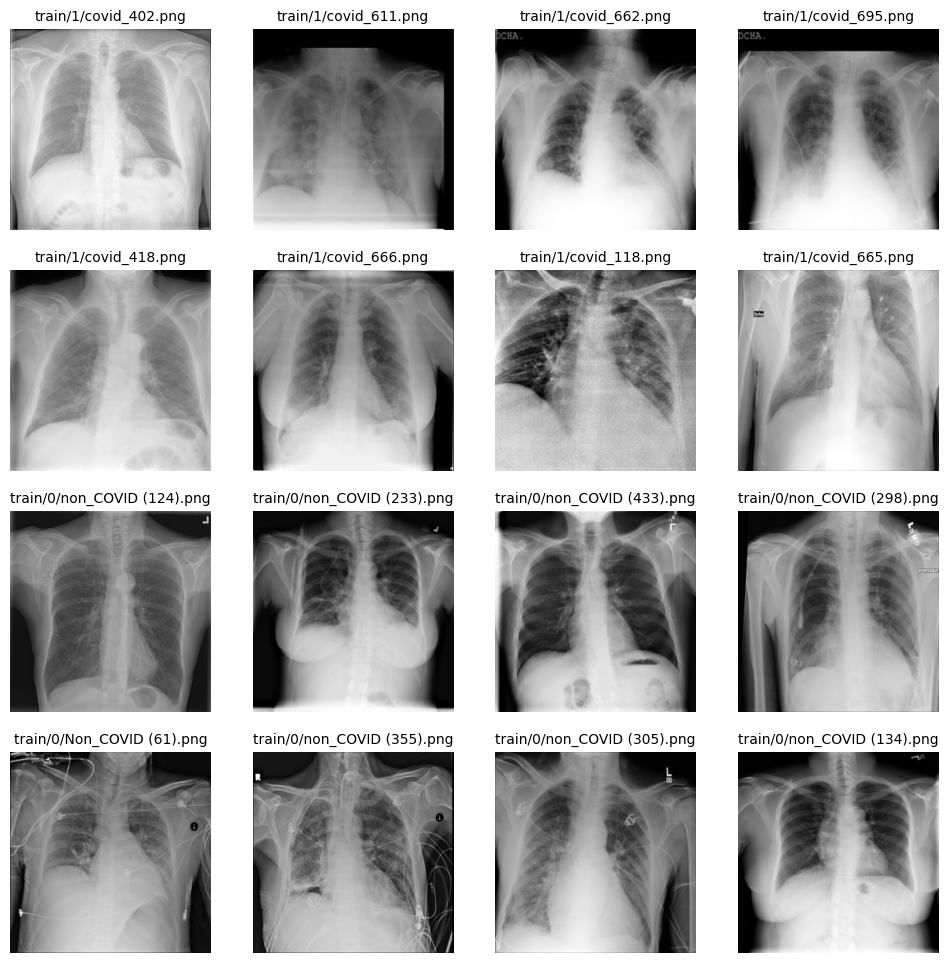

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic+normal_pic

for i, img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows, cols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap='gray')
plt.show()

**Step 4: Data Processing and Data Augmentation**

In [ ]:
# Initialize Parameters
LR = 1e-3
EPOCHS = 20
BATCH_SIZE = 64
TARGET_SIZE = (224, 224)

In [ ]:
# create data generators with image augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=20,
                                   validation_split=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                  )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=TARGET_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    subset = 'training',
                                                    shuffle=True,
                                                    class_mode='binary'
                                                   )

Found 800 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255.0)

val_generator = train_datagen.flow_from_directory(train_dir,
                                                target_size=TARGET_SIZE,
                                                batch_size=BATCH_SIZE,
                                                subset = 'validation',
                                                class_mode='binary'
                                               )

Found 200 images belonging to 2 classes.


**Step 5 : Build Model**

In [ ]:
def build_model():
    # load Xception model and ensuring the head FC layer sets are left off.
    base_model = tf.keras.applications.Xception(weights="imagenet",
                                          include_top=False,
                                          input_shape=(224,224, 3))

    for layer in base_model.layers[:-50]:
        layer.trainable = False

    # construct the head of the model that will be placed on top the above of base model
    model = tf.keras.models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return model

**Step 6 : Compile and Train the Model**

In [ ]:
def compile_model(model):
    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
      loss='binary_crossentropy',
      metrics=['accuracy'])

    # define callbacks
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                             patience=5,
                                             verbose=1,
                                             mode='max',
                                             restore_best_weights=True)

    # Fit the model
    history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=30,
                        callbacks=earlystop)

    return history

In [ ]:
model = build_model()
model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 20863529 (79.59 MB)
Trainable params: 12170353 (46.43 MB)
Non-trainable params: 8693176 (33.16 MB)
_________________________________________________________________


In [ ]:
model = build_model()
history = compile_model(model)

Epoch 1/30
13/13 [==============================] - 296s 22s/step - loss: 0.5156 - accuracy: 0.7250 - val_loss: 0.7977 - val_accuracy: 0.6800
Epoch 2/30
13/13 [==============================] - 274s 21s/step - loss: 0.3400 - accuracy: 0.8400 - val_loss: 1.0856 - val_accuracy: 0.7950
Epoch 3/30
13/13 [==============================] - 269s 21s/step - loss: 0.2390 - accuracy: 0.9075 - val_loss: 1.4282 - val_accuracy: 0.7650
Epoch 4/30
13/13 [==============================] - 263s 20s/step - loss: 0.1642 - accuracy: 0.9388 - val_loss: 1.5672 - val_accuracy: 0.7950
Epoch 5/30
13/13 [==============================] - 257s 20s/step - loss: 0.2034 - accuracy: 0.9150 - val_loss: 0.4767 - val_accuracy: 0.8300
Epoch 6/30
13/13 [==============================] - 271s 21s/step - loss: 0.1482 - accuracy: 0.9413 - val_loss: 0.4504 - val_accuracy: 0.8750
Epoch 7/30
13/13 [==============================] - 271s 21s/step - loss: 0.0755 - accuracy: 0.9737 - val_loss: 0.5904 - val_accuracy: 0.8600
Epoch 

**Step 7: Performance Evaluation**

Text(0.5, 0, 'epoch')

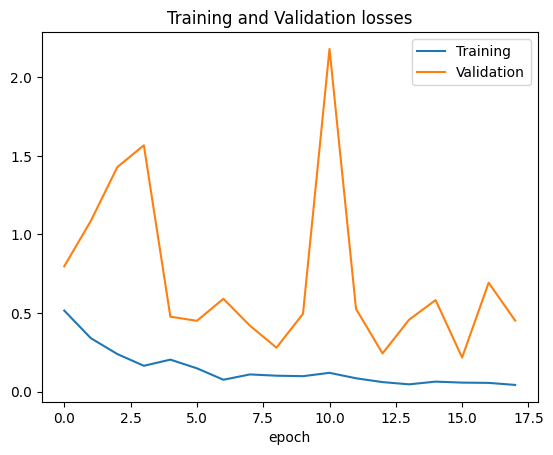

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

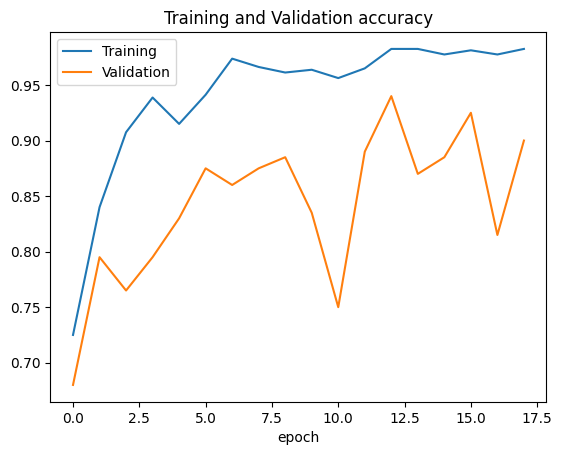

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
dgen_test = ImageDataGenerator(rescale=1./255.0)

test_generator = dgen_test.flow_from_directory(test_dir,
                                                target_size=TARGET_SIZE,
                                                batch_size=BATCH_SIZE,
                                                shuffle=False,
                                                class_mode='binary'
                                               )


Found 500 images belonging to 2 classes.


In [ ]:
# get the test acuarcy and loss
test_loss , test_acc = model.evaluate(test_generator)

print('test loss :{} test acc :{}'.format(test_loss, test_acc))

8/8 [==============================] - 85s 11s/step - loss: 0.5032 - accuracy: 0.9020
test loss :0.5032239556312561 test acc :0.9020000100135803


**Step 8: Save Model**

In [ ]:
main_dir
file_path = os.path.join(main_dir, 'Xception_covid.h5')
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
true_classes = test_generator.classes
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
predicted = model.predict(test_generator, verbose=1)
predicted_classes = np.round(predicted)
predicted_classes

8/8 [==============================] - 72s 9s/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_classes, predicted_classes)
cm_normalized = confusion_matrix(true_classes, predicted_classes, normalize='true')
cm

array([[246,   4],
       [ 45, 205]])

Text(0.5, 1.0, 'Confusion Matrix')

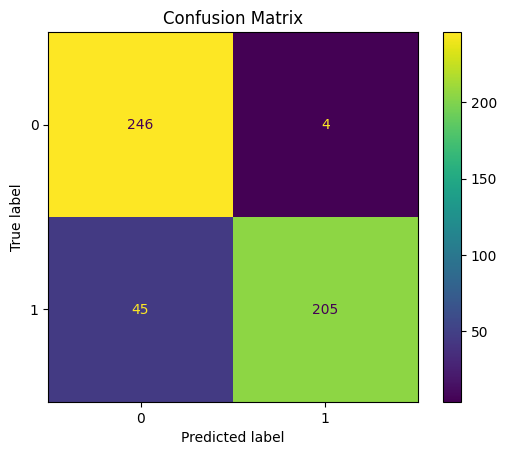

In [ ]:
# Create the ConfusionMatrixDisplay object
# cm_display = ConfusionMatrixDisplay(confusion_matrix(true_classes, predicted_classes, normalize='true'))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

# plot the confusion matrix
cm_display.plot()
plt.title("Confusion Matrix")
# plt.savefig("/kaggle/working/models/confusion_matrix.png");

**Step 9 : Model Deployment using streamlit**

In [ ]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.99s


In [40]:
%%writefile app.py
import streamlit as st
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from PIL import Image

model_path = '/content/drive/MyDrive/Omdena/Covid_Detection/Xception_covid.h5'
model = load_model(model_path)

st.image('omdena_logo.png', use_column_width=True)
st.markdown('<h1 style="color:black;">COVID X-Ray Classification Model</h1>', unsafe_allow_html=True)
st.markdown('<h2 style="color:gray;">This classification model classifies image into following categories:</h2>', unsafe_allow_html=True)
st.markdown('<h3 style="color:gray;"> COVID and Non-COVID</h3>', unsafe_allow_html=True)

img_height = 224
img_width = 224


# Load the model
# model = load_model('2023-09-07_xception.h5', compile=False)

upload= st.file_uploader('Upload X-ray image of a patient for classification', type=["png", "jpg", "jpeg"])
c1, c2= st.columns(2)
c1.header('Uploaded Image')
c2.header('Predicted Class')


if upload is not None:
    img = Image.open(upload)
    img = img.resize((224, 224))
    img = img.convert("RGB")
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    predict_coef = model.predict(img)
    predict_coef = np.round(predict_coef)
    img = load_img(upload, target_size=(img_width,img_height))
  # image = img_to_array(img)
  # image = np.expand_dims(image, axis=0)
    c1.image(img)
  # prediction = model.predict(image)
  # prediction = (prediction > 0.5).astype(int)
  # print(prediction)
    if predict_coef == 0:
      c2.write('COVID Not Detected')
    else:
      c2.write('COVID Detected')


Overwriting app.py


In [39]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session df93fc1568a4ac5


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.247.105:8501

npx: installed 22 in 4.466s
your url is: https://sharp-kiwis-worry.loca.lt
2023-09-17 13:54:54.767314: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-17 13:54:59.964 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 552, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 12, in <module>
    logo = Image.open('/content/omdena_logo.png')
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)
PIL.UnidentifiedImageError: cannot identify image file '/content/omdena_logo.png'
  Stopping...
^C
